#### Previsione del prezzo di un'azione con regressione lineare e support vector machine

https://www.youtube.com/watch?v=EYnC4ACIt2g&ab_channel=ComputerScience

In [1]:

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import yfinance as yf


importiamo i dati

In [2]:
start_date = '2014-5-31'
end_date = '2024-5-31'
df = yf.download('AMZN', start_date, end_date) 
#^GSPC

[*********************100%%**********************]  1 of 1 completed


In [3]:
len(df)

2516

In [4]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-06-02,15.629500,15.630000,15.350000,15.442000,15.442000,44068000
2014-06-03,15.287500,15.396000,15.253500,15.359500,15.359500,47584000
2014-06-04,15.342500,15.475000,15.192000,15.339000,15.339000,42142000
2014-06-05,15.405000,16.396999,15.345000,16.178499,16.178499,155934000
2014-06-06,16.250000,16.544001,16.246500,16.483500,16.483500,104880000
2014-06-09,16.578501,16.650000,16.282499,16.375000,16.375000,64244000
2014-06-10,16.382500,16.775000,16.375000,16.620501,16.620501,73268000
2014-06-11,16.799999,17.035999,16.694000,16.760000,16.760000,88736000
2014-06-12,16.777500,16.777500,16.233000,16.295500,16.295500,85526000


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-22,183.880005,185.220001,181.970001,183.130005,183.130005,28148800
2024-05-23,183.660004,184.759995,180.080002,181.050003,181.050003,33670200
2024-05-24,181.649994,182.440002,180.300003,180.750000,180.750000,27434100
2024-05-28,179.929993,182.240005,179.490005,182.149994,182.149994,29927000
2024-05-29,181.699997,184.080002,181.550003,182.020004,182.020004,31950700


Selezioniamo la colonna Adj Close

In [6]:
df = df[['Adj Close']]

In [7]:
len(df)

2516

In [8]:
df.head()

,Adj Close
Date,
2014-06-02,15.442000
2014-06-03,15.359500
2014-06-04,15.339000
2014-06-05,16.178499
2014-06-06,16.483500


In [9]:
# Numero di giorni nel futuro che si vogliono prevedere
forecast_out = 1

In [11]:
# Creiamo una colonna con la variabile da prevedere
df.loc[:,'Prediction'] = df['Adj Close'].shift(-1).copy()

In [12]:
df.head()

,Adj Close,Prediction
Date,,
2014-06-02,15.442000,15.359500
2014-06-03,15.359500,15.339000
2014-06-04,15.339000,16.178499
2014-06-05,16.178499,16.483500
2014-06-06,16.483500,16.375000


In [13]:
df.tail()

,Adj Close,Prediction
Date,,
2024-05-22,183.130005,181.050003
2024-05-23,181.050003,180.750000
2024-05-24,180.750000,182.149994
2024-05-28,182.149994,182.020004
2024-05-29,182.020004,NaN


#### Previsione prossimi 10 giorni

In [14]:
# Stabiliamo quanti "n" giorni in avanti vogliamo prevedere
forecast_out = 10
df.loc[:,'Prediction'] = df['Adj Close'].shift(-forecast_out)

In [15]:
df.head()

,Adj Close,Prediction
Date,,
2014-06-02,15.442000,16.381001
2014-06-03,15.359500,16.281000
2014-06-04,15.339000,16.719000
2014-06-05,16.178499,16.350000
2014-06-06,16.483500,16.209999


In [16]:
df.tail(15)

,Adj Close,Prediction
Date,,
2024-05-08,188.000000,183.130005
2024-05-09,189.500000,181.050003
2024-05-10,187.479996,180.750000
2024-05-13,186.570007,182.149994
2024-05-14,187.070007,182.020004
2024-05-15,185.990005,NaN
2024-05-16,183.630005,NaN
2024-05-17,184.699997,NaN
2024-05-20,183.539993,NaN


Creiamo un data set indipendente (X), trasformando il df in un array
X = np.array(df.drop(['Prediction'],1))

In [17]:
X = np.array(df['Adj Close']).reshape(-1,1)
X

array([[ 15.44200039],
       [ 15.35949993],
       [ 15.33899975],
       ...,
       [180.75      ],
       [182.1499939 ],
       [182.02000427]])

In [18]:
# Eliminiamo le ultime "n" righe
X = X[:-forecast_out]

In [19]:
print(X)
# attenzione, abbiamo creato una lista di liste

[[ 15.44200039]
 [ 15.35949993]
 [ 15.33899975]
 ...
 [187.47999573]
 [186.57000732]
 [187.07000732]]


In [20]:
len(X)

2506

In [21]:
# Creiamo il data set dipendente (y)
# Creiamo un altro array (tutti i valori compresi gli NaN)
y = np.array(df['Prediction'])
print(y)

[16.38100052 16.28100014 16.71899986 ...         nan         nan
         nan]


In [22]:
# Eliminiamo gli NaN
y = y[:-forecast_out]
print(y)

[ 16.38100052  16.28100014  16.71899986 ... 180.75       182.1499939
 182.02000427]


In [23]:
len(y)

2506

Creiamo i due data set di addestramento e prova (train, test)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
x_train

array([[ 19.26849937],
       [167.78649902],
       [114.98999786],
       ...,
       [ 24.40500069],
       [ 87.71800232],
       [183.82850647]])

In [26]:
y_train
y_train

array([ 18.31850052, 159.48899841, 121.23000336, ...,  27.64699936,
        95.90950012, 171.36849976])

### Support Vector Regressor

In [28]:
svr_rbf = SVR(kernel='rbf', C = 1e3, gamma = 0.1)

In [29]:
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, gamma=0.1)

Testiamo il modello. L'indice di capacità del modello è il coefficiente di determinazione R^2 della previsione,  che indica la percentuale di variabilità nella variable dipendente spiegata dal modello. 

Il valore di R^2 è compreso fra un minimo di 0 e un massimo di 1

In [30]:
svm_confindence = svr_rbf.score(x_test, y_test)
print('svm_confindence: ', svm_confindence)

svm_confindence:  0.9835129582390669


### Modello di regressione lineare

In [31]:
lr = LinearRegression()

In [32]:
lr.fit(x_test, y_test)

LinearRegression()

Testiamo il modello. L'indice di capacità del modello è il coefficiente di determinazione R^2 della previsione, che indica la percentuale di variabilità nella variable dipendente spiegata dal modello.

Il valore di R^2 è compreso fra un minimo di 0 e un massimo di 1

In [33]:
lr_confindence = lr.score(x_test, y_test)
print('lr_confindence: ', lr_confindence)

lr_confindence:  0.9835668818247165


Creiamo la previsione degli ultimi 10 valori

In [34]:
x_forecast = np.array(df['Adj Close'])[-forecast_out:].reshape(-1,1)
print(x_forecast)

[[185.99000549]
 [183.63000488]
 [184.69999695]
 [183.53999329]
 [183.1499939 ]
 [183.13000488]
 [181.05000305]
 [180.75      ]
 [182.1499939 ]
 [182.02000427]]


Previsione dei prossimi n valori con il modello di regressione lineare

In [35]:
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)

[186.25329931 183.90441702 184.96936819 183.81482949 183.42666744
 183.4067726  181.33656998 181.03798029 182.4313786  182.30200137]


Previsione dei prossimi n valori con il modello support vector machine

In [36]:
svm_prediction = svr_rbf.predict(x_forecast)
print(svm_prediction)

[180.76990384 176.2858144  178.98968036 175.94652765 174.46944808
 174.3989304  181.08923624 183.49334155 173.5863047  174.0489948 ]


Qual è la previsione migliore?

In [37]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [38]:
lr_rmse = sqrt(mean_squared_error(x_forecast, lr_prediction))
print(lr_rmse)

0.2774208075946503


In [40]:
svm_rmse = sqrt(mean_squared_error(x_forecast, svm_prediction))
print(svm_rmse)

6.836956890503462


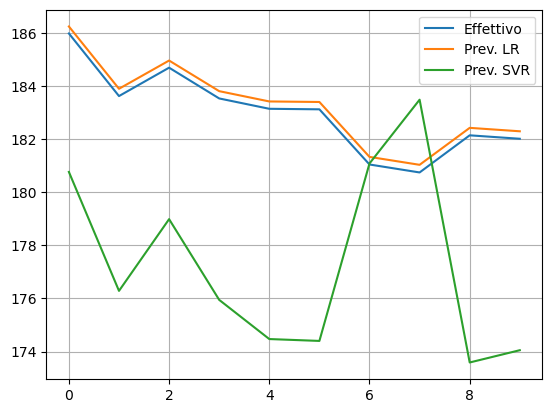

In [41]:
plt.plot(x_forecast, label = 'Effettivo')
plt.plot(lr_prediction, label = 'Prev. LR')
plt.plot(svm_prediction, label = 'Prev. SVR')
plt.grid(True)
plt.legend();


#### Previsione del prezzo di Ethereum con SVR
https://www.youtube.com/watch?v=HiDEAWdAif0&ab_channel=ComputerScience

In [91]:
from datetime import date, datetime
plt.style.use('fivethirtyeight')
#import pandas_datareader.data as web
import yfinance as yf
import pandas as pd


In [42]:
start_date = '2019-05-31'
end_date = '2024-05-31'
#end_date = datetime.today()

In [43]:
df = yf.download('ETH-USD', start_date, end_date) 

[*********************100%%**********************]  1 of 1 completed


In [44]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-31,256.015259,268.659943,249.111847,268.113556,268.113556,11255023515
2019-06-01,268.433350,273.557983,263.524597,265.391266,265.391266,9942869852
2019-06-02,265.512726,272.807220,265.041870,270.225525,270.225525,8744111713
2019-06-03,270.088562,270.334106,251.262192,252.607925,252.607925,9375712917
2019-06-04,252.511642,252.511642,236.127213,241.338791,241.338791,10132549747


In [45]:
future_days = 5

In [46]:
# Creiamo una  nuova colonna con i prezzi futuri

In [47]:
df[str(future_days) + '_Day_Price_Forecast'] = df[['Close']].shift(-future_days)

In [48]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,5_Day_Price_Forecast
Date,,,,,,,
2019-05-31,256.015259,268.659943,249.111847,268.113556,268.113556,11255023515,247.051010
2019-06-01,268.433350,273.557983,263.524597,265.391266,265.391266,9942869852,249.474335
2019-06-02,265.512726,272.807220,265.041870,270.225525,270.225525,8744111713,250.930359
2019-06-03,270.088562,270.334106,251.262192,252.607925,252.607925,9375712917,245.738098
2019-06-04,252.511642,252.511642,236.127213,241.338791,241.338791,10132549747,233.086700
2019-06-05,241.497040,248.138138,239.983459,247.051010,247.051010,8548917062,247.520126
2019-06-06,246.925247,249.944504,238.501114,249.474335,249.474335,8265146806,245.781830
2019-06-07,249.335281,254.352295,246.597900,250.930359,250.930359,8379534528,260.903290
2019-06-08,251.249313,252.377396,243.229111,245.738098,245.738098,7225996863,256.168793


In [49]:
df.tail(7)

,Open,High,Low,Close,Adj Close,Volume,5_Day_Price_Forecast
Date,,,,,,,
2024-05-24,3776.992432,3825.122559,3631.990234,3726.934570,3726.934570,22257061429,3763.196533
2024-05-25,3726.975586,3776.006592,3710.528320,3749.236572,3749.236572,10000027764,3729.298096
2024-05-26,3749.179932,3879.470703,3732.022949,3825.897461,3825.897461,14650794791,NaN
2024-05-27,3826.127197,3973.556396,3821.930420,3892.006836,3892.006836,18949181813,NaN
2024-05-28,3892.096924,3924.895752,3771.213867,3840.256348,3840.256348,19846044324,NaN
2024-05-29,3840.235107,3880.648438,3742.041260,3763.196533,3763.196533,17411416736,NaN
2024-05-30,3762.955322,3794.970459,3703.398682,3729.298096,3729.298096,16616530944,NaN


Creiamo il data set per la previsione

In [50]:
X = np.array(df[['Close']])
X = X[:df.shape[0] - future_days]

In [51]:
df.shape

(1827, 7)

In [52]:
df.shape[0]

1827

In [53]:
len(X)

1822

In [54]:
y = np.array(df[str(future_days) + '_Day_Price_Forecast'])

In [55]:
y = y[:-future_days]
print(y)

[ 247.05101013  249.47433472  250.93035889 ... 3840.25634766 3763.1965332
 3729.2980957 ]


Creiamo il data set di addestramento e test

In [56]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [57]:
svr_rbf = SVR(kernel='rbf', C = 1e3, gamma = 0.00001)
svr_rbf.fit(x_train,y_train)

SVR(C=1000.0, gamma=1e-05)

In [58]:
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print('svr_rbf confidence score is: ', svr_rbf_confidence)

svr_rbf confidence score is:  0.9727556676084053


In [59]:
svm_prediction = svr_rbf.predict(x_test)

In [60]:
print(y_test)

[1445.21655273 2018.33618164 2267.88598633  219.84851074 2109.57983398
 2938.11401367 1723.15380859  200.6890564  1593.26831055 4000.65087891
 1572.71447754  393.98736572 1823.56933594 1647.5982666  1594.91491699
 1317.99328613 2785.72753906 3155.52368164 1647.31933594 2431.9465332
 4096.91210938 1729.72570801 3883.14038086 1677.84680176  185.02867126
  178.34735107  185.9128418  1636.13781738  149.19444275  123.30602264
 1831.95483398 1937.43835449  210.52259827 2783.47631836 4168.70117188
 2807.29663086 1263.86853027 1331.71362305  774.53497314 1553.68493652
 3310.00146484 1937.06677246 2341.17529297 1861.64379883 1733.8104248
  460.14984131 3545.35400391 2466.96142578 3043.41430664 1113.5871582
  186.35519409  242.53318787 2240.68603516 3928.84472656 3763.1965332
 2633.51831055 3036.02050781 3663.85546875 3164.24511719 3040.91650391
  190.34257507 3118.34423828 3341.91967773 3122.60864258 1320.54919434
 1878.1394043  2064.42529297 2984.72753906 2333.03271484  583.71459961
 2315.1618

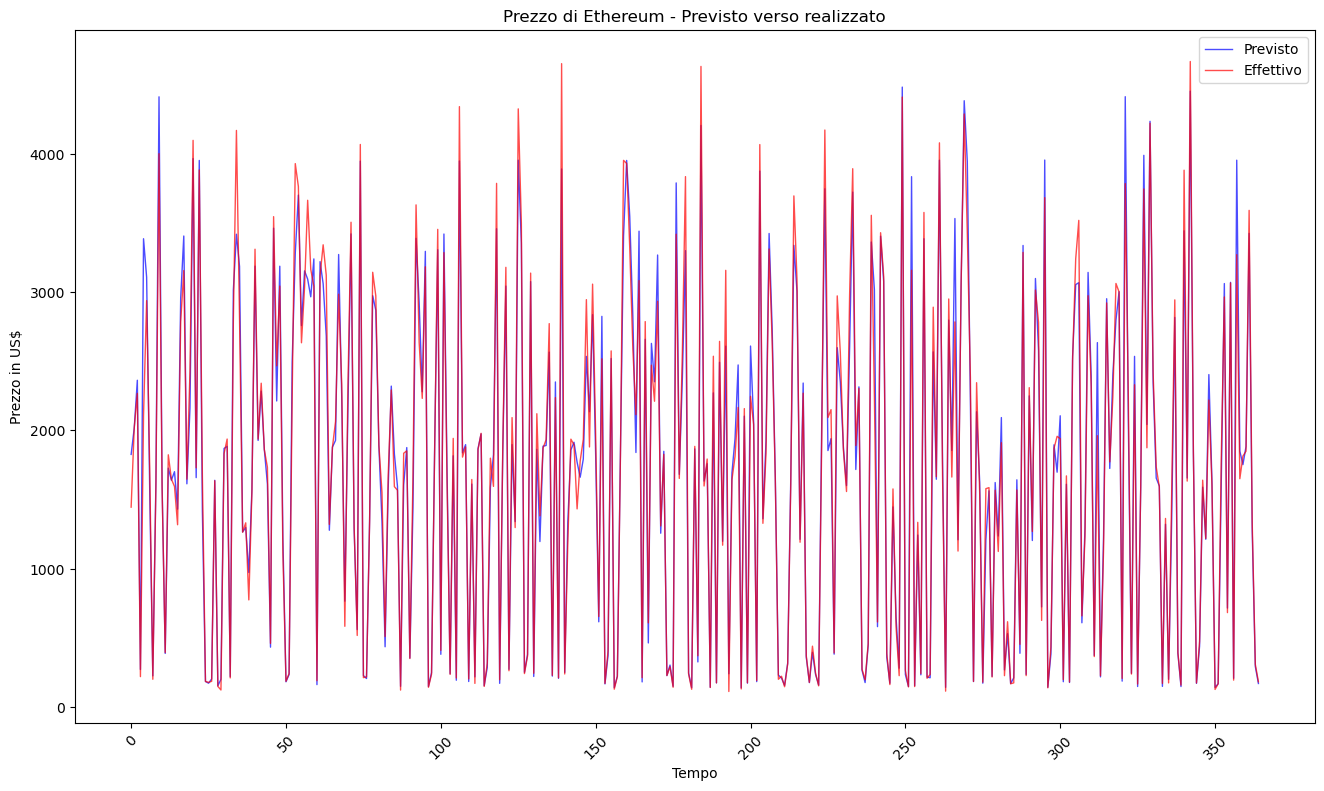

In [61]:
plt.figure(figsize=(16,9))
plt.plot(svm_prediction, label = 'Previsto', linewidth = '1', color ='b', alpha = .7)
plt.plot(y_test, label = 'Effettivo', linewidth = '1', color ='r', alpha = .7)
plt.title('Prezzo di Ethereum - Previsto verso realizzato')
plt.ylabel('Prezzo in US$')
plt.xlabel('Tempo')
plt.legend()
plt.xticks(rotation = 45)
plt.show();
